### What we're going to cover
Specifically, we're going to go through doing the following with TensorFlow:

- Architecture of a regression model
- Input shapes and output shapes
    - X: features/data (inputs)
    - y: labels (outputs)
- Creating custom data to view and fit
- Steps in modelling
    - Creating a model
    - Compiling a model
        - defining a loss function
        - Setting up an optimizer
        - Creating evaluation metrics
    - Fitting a model (getting it to find patterns in our data)
- Evaluating a model
    - Visualizng the model ("visualize, visualize, visualize")
    - Looking at training curves
    - Compare predictions to ground truth (using our evaluation metrics)
- Saving a model (so we can use it later)
- Loading a model

### Typical architecture of a regresison neural network

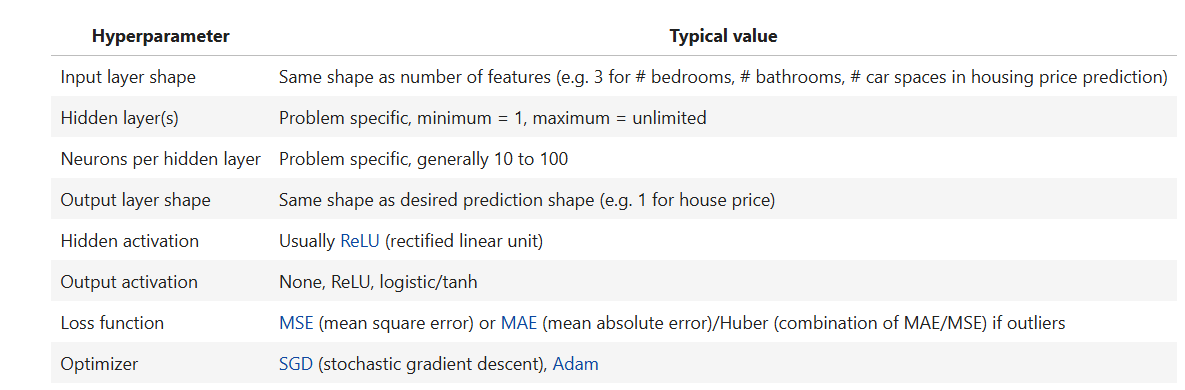

### Creating data to view and fit

In [1]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

2.18.0


In [2]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2025-01-07 17:52:50.007555


In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

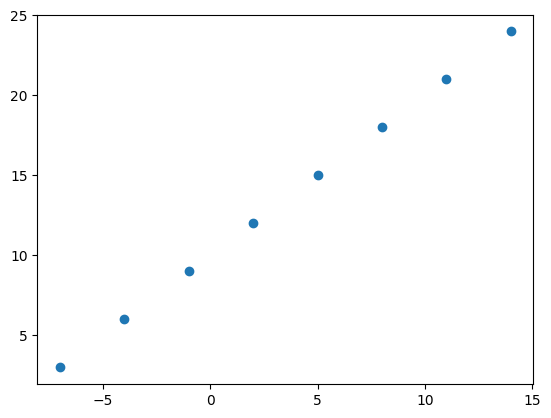

In [4]:
# Create Features
X  = np.array([-7,-4,-1,2 , 5 , 8 , 11 , 14])

# Create Labels 
y = np.array([3 , 6 , 9 , 12 , 15 , 18 , 21 , 24])

plt.scatter(X,y)

### Regression input shapes and output shapes

One of the most important concepts when working with neural networks are the input and output shapes.

- The input shape is the shape of your data that goes into the model.

- The output shape is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [5]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

In [6]:
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:

# Let's take a look at the single examples invidually
X[0], y[0]

(np.int64(-7), np.int64(3))

In [8]:
# Turning our Numpy arrays into Tensors

X = tf.constant(X)
y = tf.constant(y)

In [9]:
X , y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [10]:
X.shape , y.shape

(TensorShape([8]), TensorShape([8]))

### Steps in modelling with TensorFlow
Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

- <b>Creating a model</b> - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model</b> (known as transfer learning).
- <b>Compiling a model</b> - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
- <b>Fitting a model</b> - letting the model try to find patterns in the data (how does X get to y).

- <b>Note:</b> If you're using TensorFlow 2.7.0+, the fit() function no longer upscales input data to go from (batch_size, ) to (batch_size, 1). To fix this, you'll need to expand the dimension of input data using tf.expand_dims(input_data, axis=-1).

In our case, this means instead of using model.fit(X, y, epochs=5), use model.fit(tf.expand_dims(X, axis=-1), y, epochs=5).

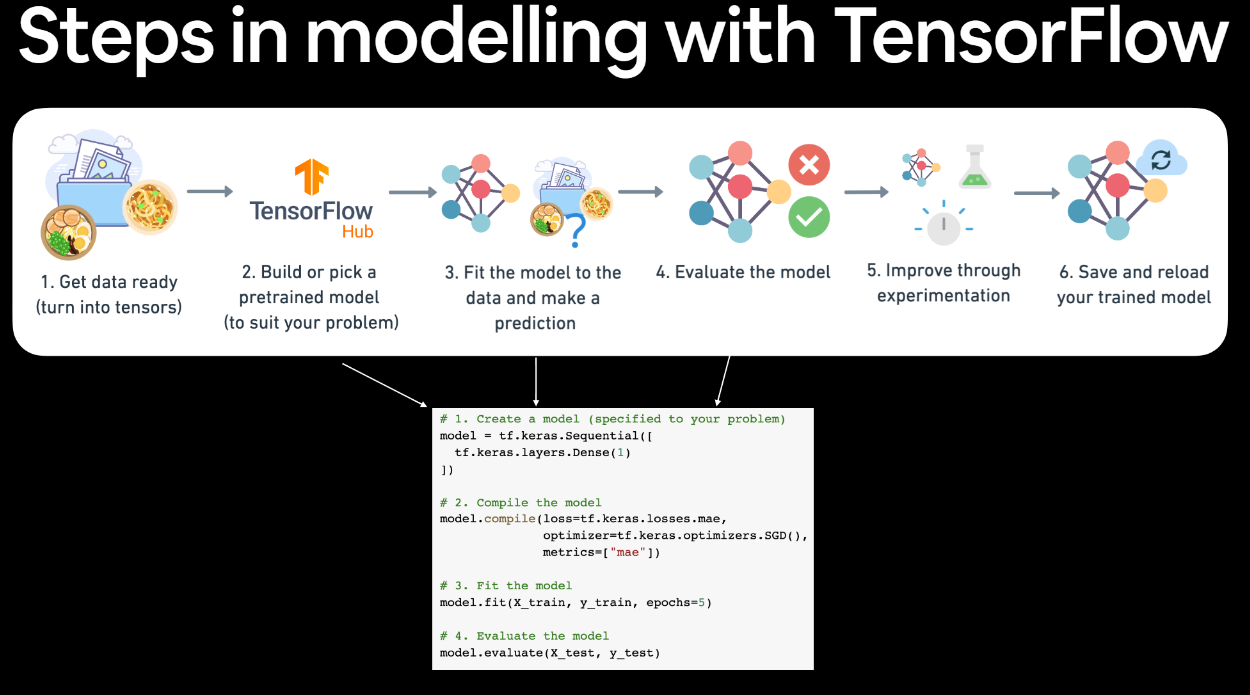

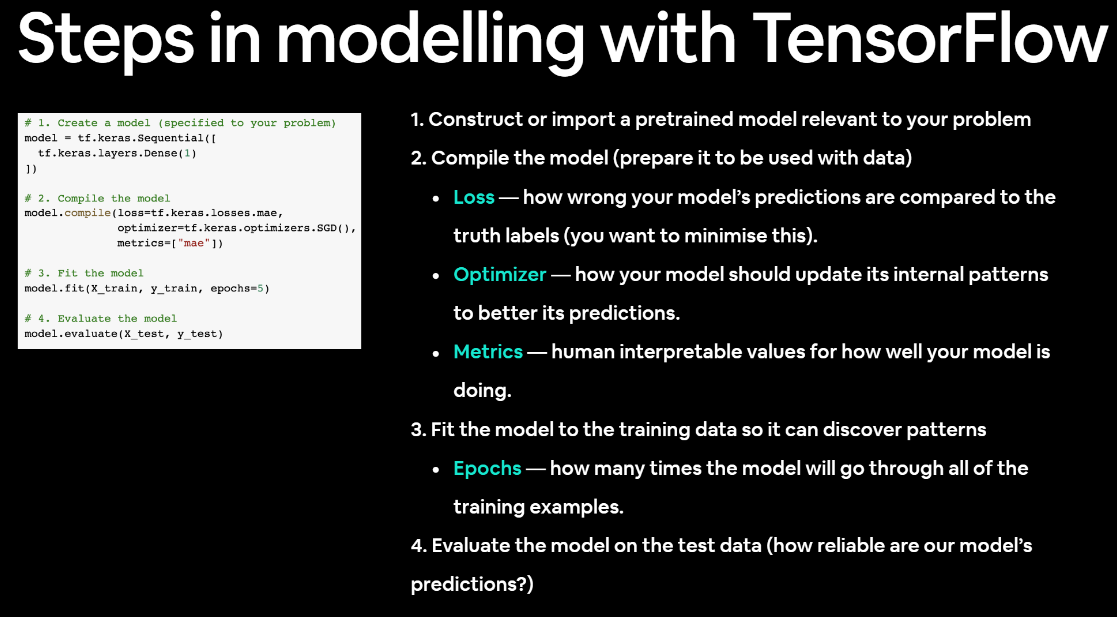

<pre>

compile(
    optimizer='rmsprop',
    loss=None,
    loss_weights=None,
    metrics=None,
    weighted_metrics=None,
    run_eagerly=False,
    steps_per_execution=1,
    jit_compile='auto',
    auto_scale_loss=True
)


model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=[
        keras.metrics.BinaryAccuracy(),
        keras.metrics.FalseNegatives(),
    ],
)


</pre>
##### Optimizer
Determines how the model weights are updated during training.  
**Examples:**
- `'adam'` (most commonly used): Adaptive optimization.
- `'sgd'` with `momentum=0.9`: Stochastic Gradient Descent with momentum.
- `keras.optimizers.Adam(learning_rate=0.001)` (custom learning rate).

---

##### Loss
Specifies the function to minimize during training, often depends on the task.  
**Examples:**
- `'sparse_categorical_crossentropy'`: For classification with integer labels.
- `'binary_crossentropy'`: For binary classification.
- `'mse'` (Mean Squared Error): For regression tasks.
- `'huber_loss'`: Robust loss for regression (less sensitive to outliers).

---

##### Metrics
Defines what to track during training and evaluation for monitoring.  
**Examples:**
- `['accuracy']`: For classification tasks.
- `['mae', 'mse']`: For regression tasks.
- `['precision', 'recall']`: For imbalanced datasets.
- `tf.keras.metrics.AUC(name='auc')`: For evaluating model performance in binary classification.



In [11]:
# Set random see 
tf.random.set_seed(42)

# Creating the model using the sequential API 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#________________________________________________
# We can also use model.add() method

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))
# model.add(tf.keras.layers.Dense(1))

#________________________________________________


#Compiling the model
model.compile(loss = tf.keras.losses.mae ,
             optimizer= tf.keras.optimizers.SGD(),
             metrics= ["mae"])

# Fitting the Model 
model.fit(tf.expand_dims(X, axis=-1),y,epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step - loss: 8.4435 - mae: 8.4435
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 8.0441 - mae: 8.0441
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 7.6168 - mae: 7.6168
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 7.4491 - mae: 7.4491
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 7.4356 - mae: 7.4356
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 7.4222 - mae: 7.4222
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 7.4088 - mae: 7.4088
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 7.3953 - mae: 7.3953
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 7.3819 - mae: 7.3819
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 7.3684 - mae: 7.3684


In [12]:
# Check out X , y 
X , y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [13]:
# Prediction 
y_pred = model.predict(tf.constant([17]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[30.739624]], dtype=float32)

### Improving a model

To improve our model, we alter almost every part of the 3 steps we went through before.

- Creating a model - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

- Compiling a model - you might want to choose optimization function or perhaps change the learning rate of the optimization function.

- Fitting a model - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

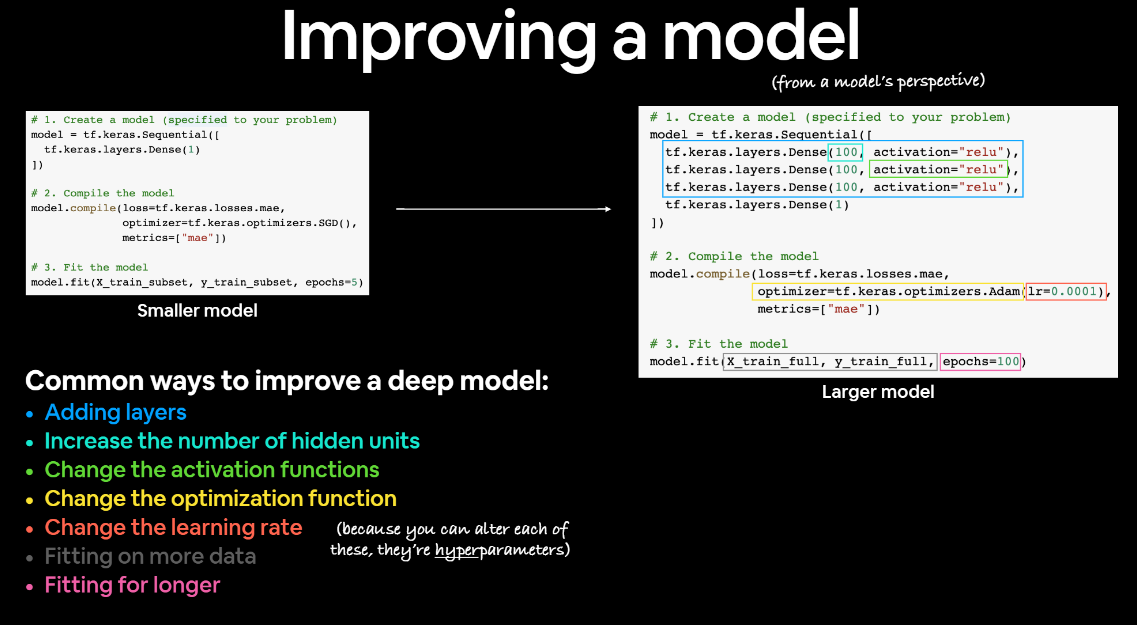

In [14]:
# Let's Only Increase the Number of Epochs and see whether our model improves ? 

# Creating the model 
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# Compiling the model

model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.mae, 
    metrics=["mae"]
)
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step - loss: 16.3802 - mae: 16.3802
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 16.0989 - mae: 16.0989
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 15.8177 - mae: 15.8177
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 15.5364 - mae: 15.5364
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 15.2552 - mae: 15.2552
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 14.9739 - mae: 14.9739
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 14.7726 - mae: 14.7726
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 14.6401 - mae: 14.6401
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 14.5076 - mae: 14.5076
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 14.3751 - mae: 14.3751
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 14.2426 - mae: 14.2426
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 14.1101 - mae: 14.1101
Epoch 13/100
1/1 ━━━━━━

- Results : as we can see just by increasing the number  of epochs we improved the model

In [15]:
# Prediction 
y_pred = model.predict(tf.constant([17]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[29.602615]], dtype=float32)

In [16]:
# Let's Add Extra Layers and see how our model improves 

# Creating the model 
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(100 , activation='relu'))
model.add(tf.keras.layers.Dense(1))

# Compiling the model

model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.mae, 
    metrics=["mae"]
)

# fitting the Model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step - loss: 13.4112 - mae: 13.4112
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 12.8446 - mae: 12.8446
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 12.2750 - mae: 12.2750
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 11.6988 - mae: 11.6988
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 11.1063 - mae: 11.1063
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 10.4963 - mae: 10.4963
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 9.8614 - mae: 9.8614
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.1959 - mae: 9.1959
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 8.4959 - mae: 8.4959
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 7.7562 - mae: 7.7562
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 6.9736 - mae: 6.9736
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 6.1351 - mae: 6.1351
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

Results : as we can see just by increasing the number of hidden Layers and  epochs we improved the model even more

In [17]:
# Prediction 
y_pred = model.predict(tf.constant([17]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[31.879353]], dtype=float32)

- Results : Okay it is improving the performance but on new data the value is more deviated from actual it should be it meant , our model is getting overfitted

In [18]:
# Let's increase Layers and also the optimizer 


# Creating the model 
model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Dense(1))
model2.add(tf.keras.layers.Dense(100 , activation=None))
model2.add(tf.keras.layers.Dense(1))

# Compiling the model

model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.mae, 
    metrics=["mae"]
)

# fitting the Model
model2.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.9165 - mae: 12.9165
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 12.2497 - mae: 12.2497
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.5534 - mae: 11.5534
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 10.8201 - mae: 10.8201
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 10.0432 - mae: 10.0432
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 9.2164 - mae: 9.2164
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 8.3334 - mae: 8.3334
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 7.3880 - mae: 7.3880
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 6.4386 - mae: 6.4386
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 6.4918 - mae: 6.4918
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 6.7739 - mae: 6.7739
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 7.0793 - mae: 7.0793
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [19]:
# Prediction 
y_pred = model2.predict(tf.constant([17]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[27.84307]], dtype=float32)

- Results : Okay so we are getting the closest Value now

In [20]:
# In Above let's simply change the activation function and see results


# Creating the model 
model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Dense(1))
model2.add(tf.keras.layers.Dense(100 , activation=None))
model2.add(tf.keras.layers.Dense(1))

# Compiling the model

model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.mae, 
    metrics=["mae"]
)

# fitting the Model
model2.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.6179 - mae: 13.6179
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 13.1866 - mae: 13.1866
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 12.7486 - mae: 12.7486
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 12.2842 - mae: 12.2842
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 11.7886 - mae: 11.7886
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 11.2581 - mae: 11.2581
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 10.6888 - mae: 10.6888
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.0763 - mae: 10.0763
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.4159 - mae: 9.4159
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 8.7026 - mae: 8.7026
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.9306 - mae: 7.9306
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.0936 - mae: 7.0936
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━

In [21]:
# Prediction 
y_pred = model2.predict(tf.constant([17]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[27.092821]], dtype=float32)

- Results : Okay so we are getting the closest Value now , it even improved more.

### Evaluating a model
<pre>
A typical workflow you'll go through when building neural networks is:

Build a model => evaluate it => build (tweak) a model => evaulate it => build (tweak) a model => evaluate it...
    
The tweaking comes from maybe not building a model from scratch but adjusting an existing one.
</pre>

##### Visualize, visualize, visualize labels)?

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

- The data - what data are you working with? What does it look like?
- The model itself - what does the architecture look like? What are the different shapes?
- The training of a model - how does a model perform while it learns?
- The predictions of a model - how do the predictions of a model line up against the ground truth (the original labels)?

In [22]:
# Making a new Dataset 
X = tf.range(-100 , 100 , 4)
y = X + 10 

X , y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

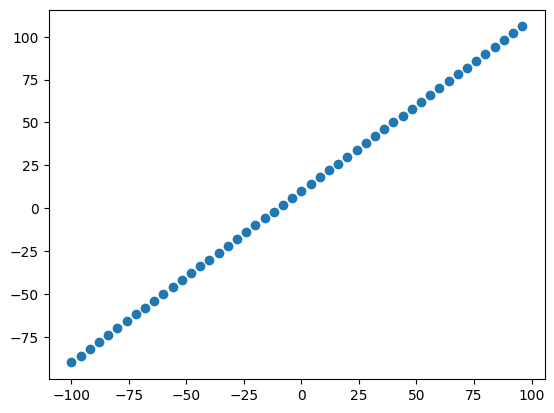

In [23]:
import matplotlib.pyplot as plt 

plt.scatter(X , y )

#### The 3 Sets....
- Training set  :  The model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
- Validation set :  The model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
- Test set : The model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

In [24]:
# Deviding Our Data Set 
len(X)

50

In [25]:
# X_train = X[:40]
# y_train = y[:40]

# X_test = X[:10]
# y_test = y[:10]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.numpy() , y.numpy(), test_size=0.2, random_state=42)

X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

#### Visualizing the Data

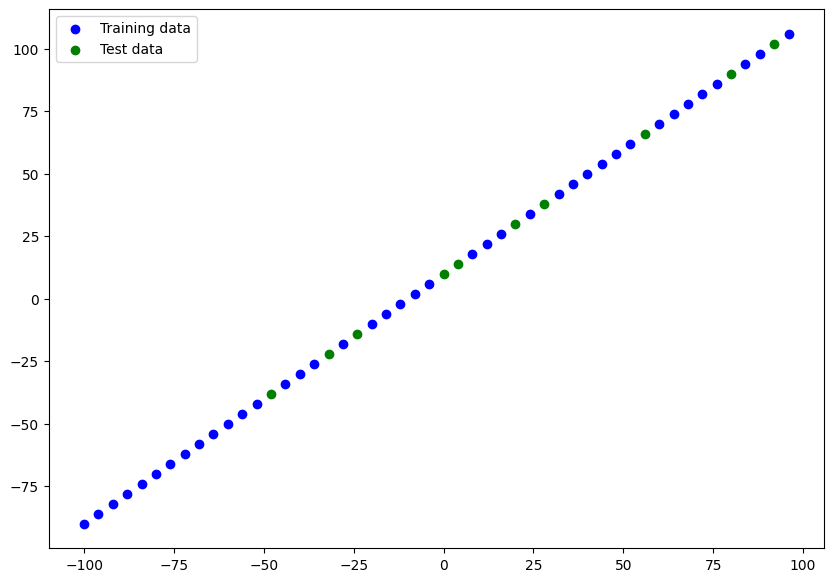

In [26]:
plt.figure(figsize=(10,7))
plt.scatter(X_train , y_train , c="b" , label="Training data")
plt.scatter(X_test , y_test , c="g" , label="Test data")
plt.legend()

In [27]:
# Building Model : 

# Creating the model 
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=[1])) # Sometime we need to define input shape as well : model.add(tf.keras.layers.Dense(1, input_shape=[1])) 

# Compiling the model 

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.mae,
    metrics=['mae']
)

D:\PLACEMENTS\DeepLearningCourse\TensorFlow\tensorflow_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Visualizing the Model

In [28]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

- Total params - total number of parameters in the model.
- Trainable parameters - these are the parameters (patterns) the model can update as it trains.
- Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

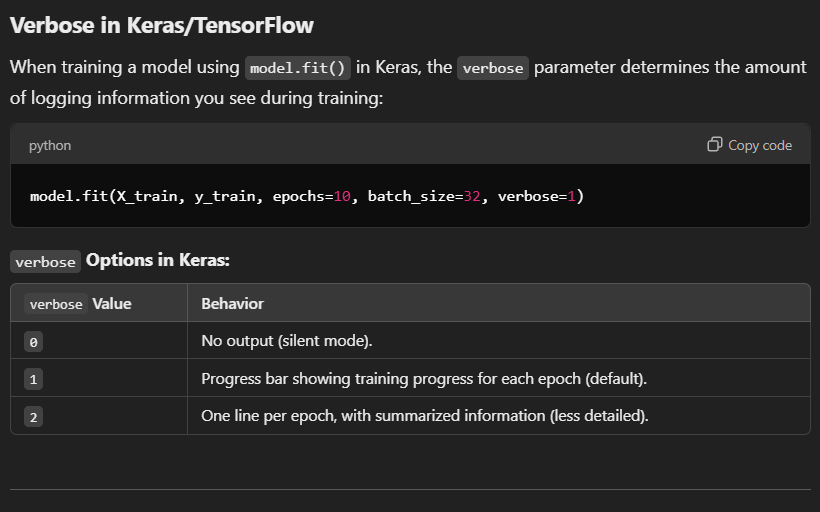

In [29]:
# Fitting the model 
model.fit(tf.expand_dims(X_train, axis=-1) , y_train , epochs =100 , verbose=2)

Epoch 1/100
2/2 - 1s - 269ms/step - loss: 94.5231 - mae: 94.5231
Epoch 2/100
2/2 - 0s - 42ms/step - loss: 93.5104 - mae: 93.5104
Epoch 3/100
2/2 - 0s - 32ms/step - loss: 92.5175 - mae: 92.5175
Epoch 4/100
2/2 - 0s - 31ms/step - loss: 91.5277 - mae: 91.5277
Epoch 5/100
2/2 - 0s - 32ms/step - loss: 90.5389 - mae: 90.5389
Epoch 6/100
2/2 - 0s - 32ms/step - loss: 89.5505 - mae: 89.5505
Epoch 7/100
2/2 - 0s - 32ms/step - loss: 88.5622 - mae: 88.5622
Epoch 8/100
2/2 - 0s - 31ms/step - loss: 87.5739 - mae: 87.5739
Epoch 9/100
2/2 - 0s - 30ms/step - loss: 86.5856 - mae: 86.5856
Epoch 10/100
2/2 - 0s - 32ms/step - loss: 85.5971 - mae: 85.5971
Epoch 11/100
2/2 - 0s - 32ms/step - loss: 84.6085 - mae: 84.6085
Epoch 12/100
2/2 - 0s - 29ms/step - loss: 83.6198 - mae: 83.6198
Epoch 13/100
2/2 - 0s - 28ms/step - loss: 82.6308 - mae: 82.6308
Epoch 14/100
2/2 - 0s - 30ms/step - loss: 81.6417 - mae: 81.6417
Epoch 15/100
2/2 - 0s - 28ms/step - loss: 80.6525 - mae: 80.6525
Epoch 16/100
2/2 - 0s - 30ms/step

In [30]:
# Building Model : 

# Creating the model 
model = tf.keras.Sequential(name="Test_Model")
model.add(tf.keras.layers.Dense(10,input_shape=[1] , name = "input_layer")) # Sometime we need to define input shape as well : model.add(tf.keras.layers.Dense(1, input_shape=[1])) 
model.add(tf.keras.layers.Dense(1 , name = "output_layer"))


# Compiling the model 
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.mae,
    metrics=['mae']
)

In [31]:
model.summary()

Model: "Test_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

#### Plotting the model

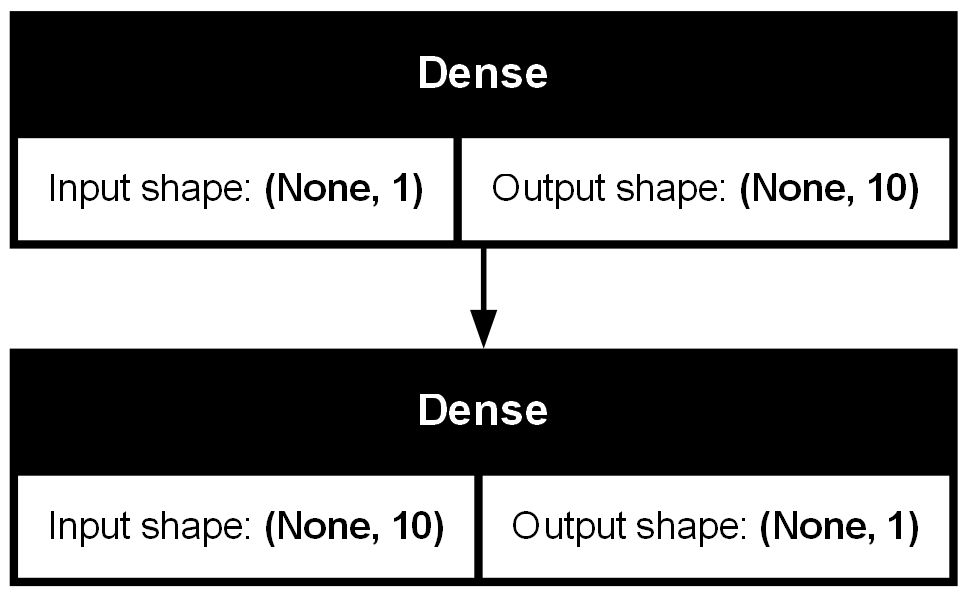

In [32]:
from tensorflow.keras.utils import plot_model 

plot_model(model = model , show_shapes = True)

#### Visualizing Model's predictions

ow we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).

First, we'll make some predictions on the test data (X_test), remember the model has never seen the test data.

In [33]:
# Fitting the model 
model.fit(tf.expand_dims(X_train, axis=-1) , y_train , epochs =100 , verbose=2)

Epoch 1/100
2/2 - 1s - 382ms/step - loss: 78.4800 - mae: 78.4800
Epoch 2/100
2/2 - 0s - 37ms/step - loss: 69.5295 - mae: 69.5295
Epoch 3/100
2/2 - 0s - 33ms/step - loss: 60.7939 - mae: 60.7939
Epoch 4/100
2/2 - 0s - 31ms/step - loss: 52.1177 - mae: 52.1177
Epoch 5/100
2/2 - 0s - 34ms/step - loss: 43.5085 - mae: 43.5085
Epoch 6/100
2/2 - 0s - 30ms/step - loss: 35.0107 - mae: 35.0107
Epoch 7/100
2/2 - 0s - 30ms/step - loss: 26.7575 - mae: 26.7575
Epoch 8/100
2/2 - 0s - 29ms/step - loss: 18.7147 - mae: 18.7147
Epoch 9/100
2/2 - 0s - 30ms/step - loss: 11.7733 - mae: 11.7733
Epoch 10/100
2/2 - 0s - 29ms/step - loss: 10.0201 - mae: 10.0201
Epoch 11/100
2/2 - 0s - 31ms/step - loss: 10.7033 - mae: 10.7033
Epoch 12/100
2/2 - 0s - 28ms/step - loss: 12.5171 - mae: 12.5171
Epoch 13/100
2/2 - 0s - 33ms/step - loss: 14.0592 - mae: 14.0592
Epoch 14/100
2/2 - 0s - 32ms/step - loss: 13.8773 - mae: 13.8773
Epoch 15/100
2/2 - 0s - 31ms/step - loss: 12.3356 - mae: 12.3356
Epoch 16/100
2/2 - 0s - 33ms/step

In [34]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


array([[-37.978485],
       [ 65.952934],
       [ 29.976677],
       [ 89.93712 ],
       [-21.98904 ],
       [101.92921 ],
       [ 13.987226],
       [  9.989863],
       [ 37.9714  ],
       [-13.994311]], dtype=float32)

In [35]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([-38,  66,  30,  90, -22, 102,  14,  10,  38, -14], dtype=int32)>

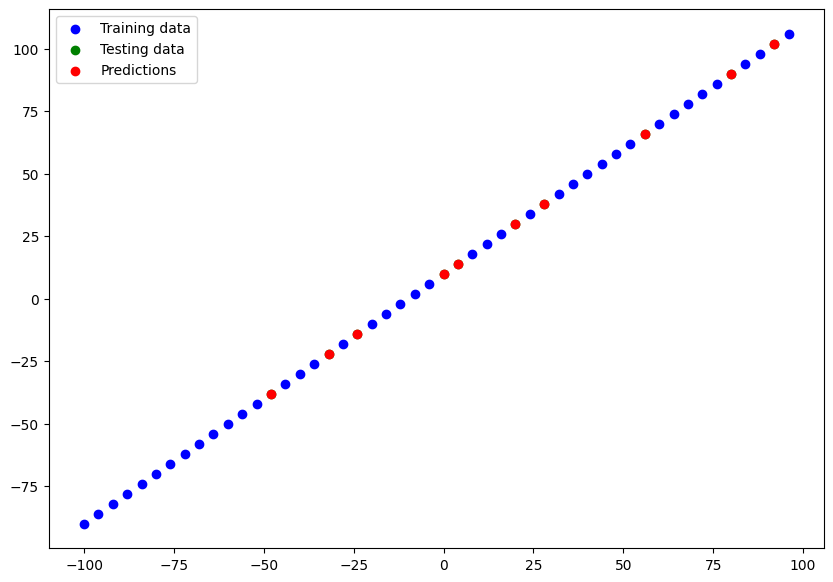

In [36]:
# Let's Create A Plotting Funtion 

def plot_predictions(train_data = X_train , 
                    train_labels= y_train , 
                    test_data=X_test,
                    test_labels=y_test, 
                    predictions=y_pred): 
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c="b" , label="Training data")
    plt.scatter(test_data,test_labels,c="g" , label="Testing data")
    plt.scatter(test_data,predictions, c="r" , label="Predictions")
    plt.legend();

plot_predictions()

### Evaluating predictions : Regression Evaluations Metrics

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems 

- Mean absolute error (MAE) - the mean difference between each of the predictions.- 
Mean squared error (MSE) - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).are:

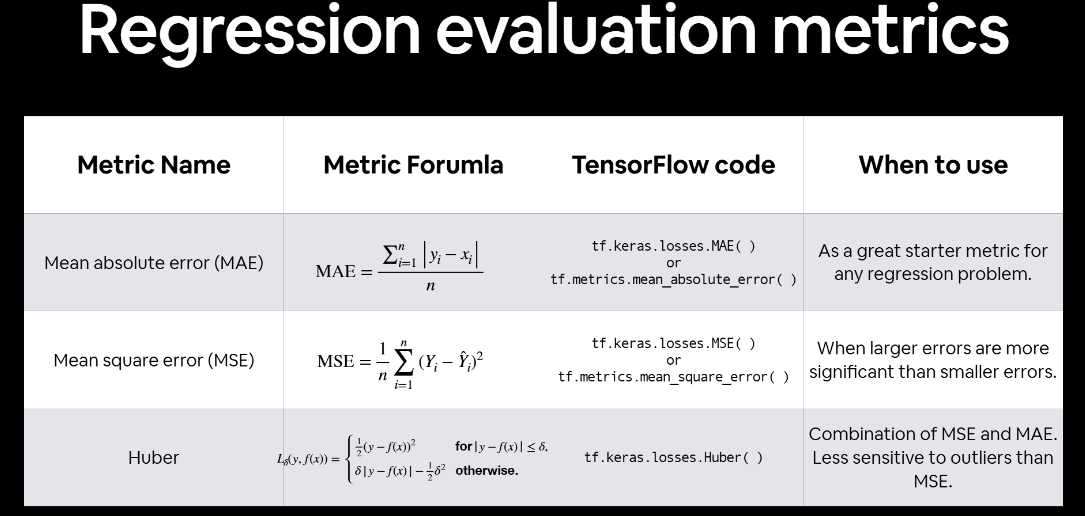

In [37]:
# Evaluate the model on the test 

model.evaluate(X_test , y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step - loss: 0.0294 - mae: 0.0294


[0.029373645782470703, 0.029373645782470703]

##### Calculate the MAE 

In [38]:
mae = tf.metrics.mae(y_true=y_test ,y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.02151489, 0.04706573, 0.02332306, 0.06288147, 0.01095963,
       0.07079315, 0.01277447, 0.0101366 , 0.02859879, 0.00568867],
      dtype=float32)>

Huh? That's strange, MAE should be a single output.

Instead, we get 10 values.

This is because our y_test and y_preds tensors are different shapes.

In [41]:
# Check the tensor shapes
y_test.shape, y_pred.shape

(TensorShape([10]), (10, 1))

Remember how we discussed dealing with different input and output shapes is one the most common issues you'll come across, this is one of those times.

But not to worry.

We can fix it using squeeze(), it'll remove the the 1 dimension from our y_preds tensor, making it the same shape as y_test.

🔑 Note: If you're comparing two tensors, it's important to make sure they're the right shape(s) (you won't always have to manipulate the shapes, but always be on the look out, many errors are the result of mismatched tensors, especially mismatched input and output shapes).

In [42]:
mae = tf.metrics.mae(y_true=y_test ,y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.029373645782470703>

In [44]:
print(mae.numpy())

0.029373646


In [46]:
mse = tf.metrics.mse(y_true=y_test ,y_pred=tf.squeeze(y_pred))
print(mae.numpy())

0.029373646


In [59]:
# Again, it's a good idea to functionize anything you think you might use over again (or find yourself using over and over again).
# Let's make functions for our evaluation metrics
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mae(y_test,tf.squeeze(y_pred))
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mse(y_test,tf.squeeze(y_pred))

### Running Experiments to improve our Model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns).
2. Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find the patterns in the data.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

1. model_1 - same as original model, 1 layer, trained for 100 epochs.
2. model_2 - 2 layers, trained for 100 epochs.
3. model_3 - 2 layers, trained for 500 epochs.

**Build Model - 1**

In [51]:
# Set the seed 
tf.random.set_seed(42)

# 1. Create The Model 
model_1 =  tf.keras.Sequential(name="Model_1")
model_1.add(tf.keras.layers.Dense(1,input_shape=[1],name="Input_Layer"))

# 2. Compile The Model
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss= tf.keras.losses.mae,
    metrics=["mae"]
)

# 3. Fit the Model 
model_1.fit(X_train , y_train , epochs=100)

Epoch 1/100


D:\PLACEMENTS\DeepLearningCourse\TensorFlow\tensorflow_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 15.4727 - mae: 15.4727 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 14.5786 - mae: 14.5786
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 13.7432 - mae: 13.7432
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.9661 - mae: 12.9661
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 12.2310 - mae: 12.2310
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.5685 - mae: 11.5685
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.0589 - mae: 11.0589
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.6813 - mae: 10.6813
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.4952 - mae: 10.4952
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 10.3752 - mae: 10.3752
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.2650 - mae: 10.2650
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.1627 - mae: 10.1627
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


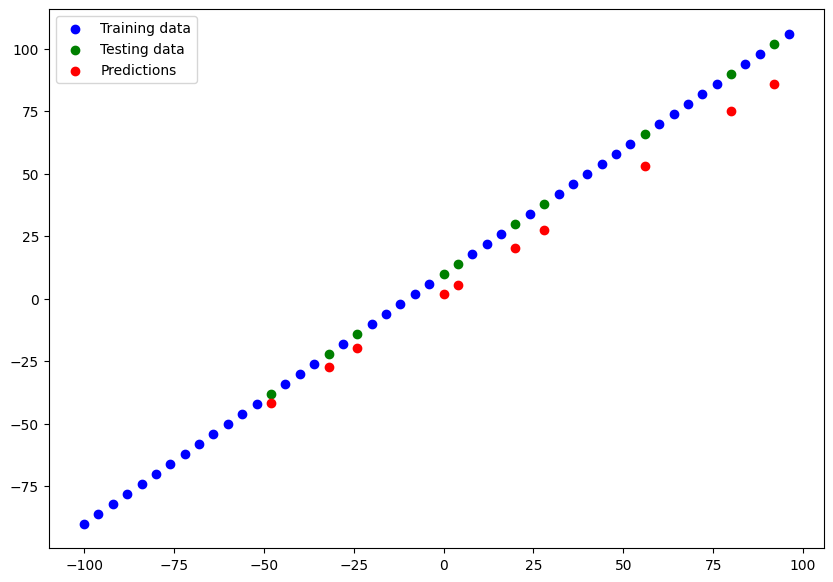

In [52]:
# Make and Plot Predictions for Model_1 
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [60]:
# Calculate model_1 evaluation metrics 
mae_1 = mae(y_test , y_pred_1)
mse_1 = mse(y_test , y_pred_1)
mae_1.numpy() , mse_1.numpy()

(np.float32(9.500986), np.float32(105.534195))

**Build Model - 2**

In [61]:
# Setting the seed
tf.random.set_seed(42)

# Creating the Model
model_2 = tf.keras.Sequential(name = "Model_2")
model_2.add(tf.keras.layers.Dense(10,input_shape=[1],name="Input_Layer"))
model_2.add(tf.keras.layers.Dense(1,name="Output_Layer"))

# Compiling the model 
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

# Fit the Model 
model_2.fit(X_train , y_train , epochs=100)

Epoch 1/100


D:\PLACEMENTS\DeepLearningCourse\TensorFlow\tensorflow_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 27.6785 - mae: 27.6785 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 19.8565 - mae: 19.8565
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 12.8358 - mae: 12.8358
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 9.2630 - mae: 9.2630
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 9.7910 - mae: 9.7910
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.1035 - mae: 10.1035
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.3540 - mae: 10.3540
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 10.3563 - mae: 10.3563
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 9.9239 - mae: 9.9239
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.5976 - mae: 9.5976
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.2452 - mae: 9.2452
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.8674 - mae: 8.8674
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/st

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


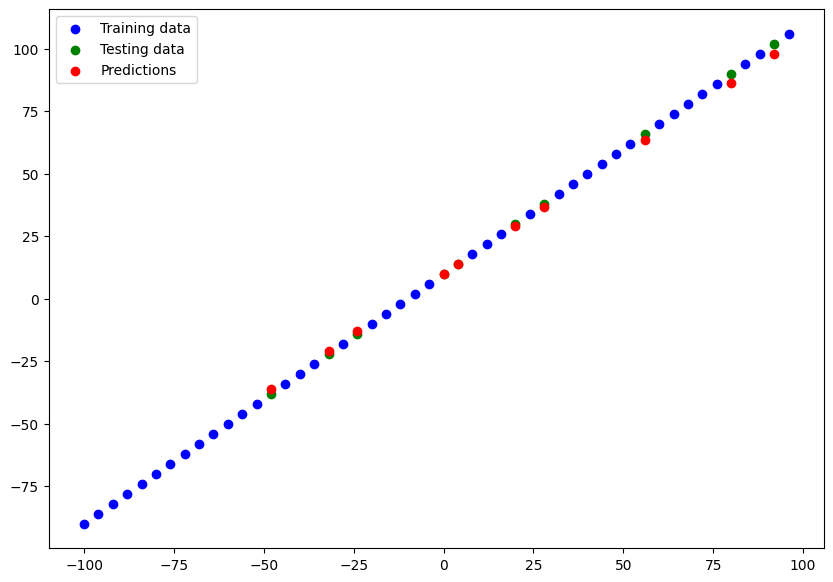

In [62]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [63]:
# Calculate model_2 evaluation metrics 
mae_2 = mae(y_test , y_pred_2)
mse_2 = mse(y_test , y_pred_2)
mae_2.numpy() , mse_2.numpy()

(np.float32(1.6740986), np.float32(4.3414083))

**Build Model - 3**

In [64]:
# Set the seed 
tf.random.set_seed(42)

# Create the Model
model_3 = tf.keras.Sequential(name="Model_3")
model_3.add(tf.keras.layers.Dense(10 , input_shape=[1] , name="Input_Layer"))
model_3.add(tf.keras.layers.Dense(1 , name="Output_Layer"))

# Compile the Layer 
model_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

# Fit the Model 
model_3.fit(X_train , y_train , epochs=500)

Epoch 1/500


D:\PLACEMENTS\DeepLearningCourse\TensorFlow\tensorflow_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 17.4508 - mae: 17.4508 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.7883 - mae: 10.7883
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.5667 - mae: 9.5667
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.9478 - mae: 9.9478
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.0981 - mae: 10.0981
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 10.0834 - mae: 10.0834
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.9441 - mae: 9.9441
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.7078 - mae: 9.7078
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.3951 - mae: 9.3951
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.0217 - mae: 9.0217
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.6000 - mae: 8.6000
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.1579 - mae: 8.1579
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step -

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


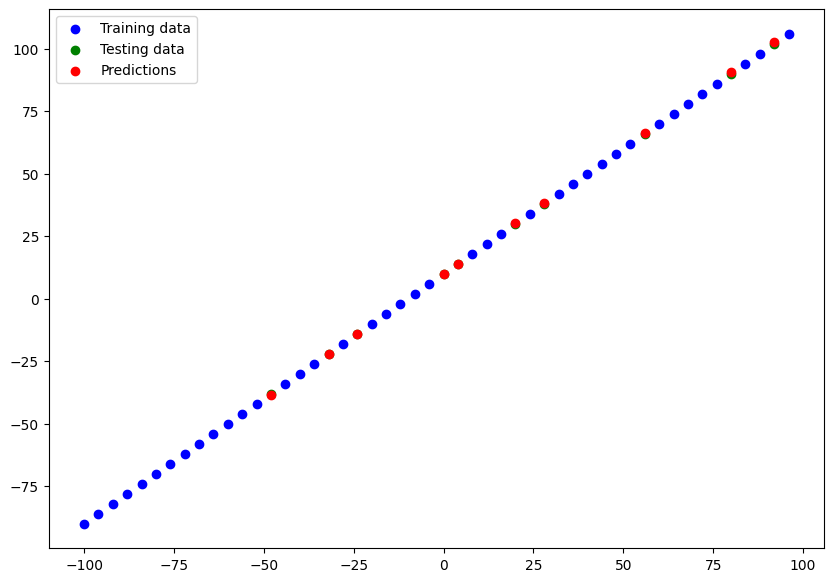

In [65]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [66]:
# Calculate model_2 evaluation metrics 
mae_3 = mae(y_test , y_pred_3)
mse_3 = mse(y_test , y_pred_3)
mae_3.numpy() , mse_3.numpy()

(np.float32(0.29952163), np.float32(0.13950689))

### Comparing Results

In [67]:
import pandas as pd 
all_results = [["Model_1",mae_1.numpy(),mse_1.numpy()],
              ["Model_2",mae_2.numpy(),mse_2.numpy()],
              ["Model_3",mae_3.numpy(),mse_3.numpy()]]

results_df = pd.DataFrame(all_results , columns=["Model" , "Mae" , "Mse"])
results_df

,Model,Mae,Mse
0,Model_1,9.500986,105.534195
1,Model_2,1.674099,4.341408
2,Model_3,0.299522,0.139507


In [68]:
model_3.summary()

Model: "Model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

### Tracking your experiments

One really good habit to get into is tracking your modelling experiments to see which perform better than others.

We've done a simple version of this above (keeping the results in different variables).

📖 Resource: But as you build more models, you'll want to look into using tools such as:

- TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
- Weights & Biases - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

### Saving a model

Once you've trained a model and found one which performs to your liking, you'll probably want to save it for use elsewhere (like a web application or mobile device).

You can save a TensorFlow/Keras model using model.save().

There are two ways to save a model in TensorFlow:

- The SavedModel format (default).
- The HDF5 format.
- .keras format
  
Which one should you use?

It depends on your situation but the SavedModel format will suffice most of the time.

Both methods use the same method call.

In [72]:
# Save a model using the SavedModel format
model_3.save('best_model.h5')

**New high-level .keras format**
- The new Keras v3 saving format, marked by the .keras extension, is a more simple, efficient format that implements name-based saving, ensuring what you load is exactly what you saved, from Python's perspective. This makes debugging much easier, and it is the recommended format for Keras.

In [73]:
# Save a model using the SavedModel format
model_3.save('best_model.keras')

**SavedModel format**

The SavedModel format is another way to serialize models. Models saved in this format can be restored using tf.keras.models.load_model and are compatible with TensorFlow Serving

The SavedModel format is a directory containing a protobuf binary and a TensorFlow checkpoint. 

Keras also lets you to create a lightweight version of your model for inferencing that contains the model's forward pass only (the call() method). This TensorFlow SavedModel artifact can then be served via TF-Serving, and all original code of the model (including custom layers) are no longer necessary to reload the artifact--it is entirely standalone.

APIs
model.export(), which exports the model to a lightweight SavedModel artifact for inference
artifact.serve(), which calls the exported artifact's forward pass
Lower level API for customization:

keras.export.ExportArchive, which can be used to customize the serving endpoints. This is used internally by model.export().
Simple exporting with ..

In [81]:
model_3.export('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


Saved artifact at 'best_model_SavedModel_format'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_31')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2140602269968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2140602270544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2140602270736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2140602273040: TensorSpec(shape=(), dtype=tf.resource, name=None)


### Loading a model

In [84]:
loaded_model_h5 = tf.keras.models.load_model('best_model.h5')

In [85]:
loaded_model_h5.summary()

Model: "Model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [103]:
loaded_model_keras = tf.keras.models.load_model('best_model.keras')

D:\PLACEMENTS\DeepLearningCourse\TensorFlow\tensorflow_env\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [87]:
loaded_model_keras.summary()

Model: "Model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_Layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64 (260.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33 (136.00 B)

Keras also lets you to create a lightweight version of your model for inferencing that contains the model's forward pass only (the call() method). This TensorFlow SavedModel artifact can then be served via TF-Serving, and all original code of the model (including custom layers) are no longer necessary to reload the artifact--it is entirely standalone.

APIs
model.export(), which exports the model to a lightweight SavedModel artifact for inference
artifact.serve(), which calls the exported artifact's forward pass
Lower level API for customization:

keras.export.ExportArchive, which can be used to customize the serving endpoints. This is used internally by model.export().
Simple exporting with .

In [101]:
loaded_model_SavedModel= tf.saved_model.load('best_model_SavedModel_format')

##### Verifying Loaded Model

In [104]:
loaded_model_keras_preds = loaded_model_keras.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


In [106]:
loaded_model_keras_preds==y_pred_3

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])